In [1]:
from mcbj import *
from pca_and_ml import *
from noise import *
from IPython.display import display, Markdown
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, StrMethodFormatter
import pandas as pd
import re

import filter_traces
import plots

date = "22_09_07"
sample_rate = 50_000
# home_folder = Path(f"D:/BJ_Data/{date}")
home_folder = Path(f'//DATACENTER/BreakJunction_group/BJ_Data/{date}')

In [5]:
traces_BPY_4 = np.hstack((np.arange(start=1001, stop=1200, step=1), np.arange(start=6204, stop=7300, step=1)))

In [7]:
# calculate histogram
hist = Histogram(folder=home_folder,
                     traces=traces_BPY_4,  #8000
                     conductance_range=(1e-5, 10),
                     conductance_log_scale=True,
                     conductance_bins_num=100,
                     conductance_bins_mode='total')

hist.calc_stats(align_at=0.5, interpolate=True,
                range_pull=(-0.5, 1),
                range_push=(-0.5, 1.5))

hist.calc_corr_hist_2d()

# hist.save_histogram(fname='hist_BPY_8000.h5')

  0%|          | 0/1295 [00:00<?, ?it/s]

Pull 2D histogram created from 1295 traces
Push 2D histogram created from 1295 traces


  0%|          | 0/1295 [00:00<?, ?it/s]

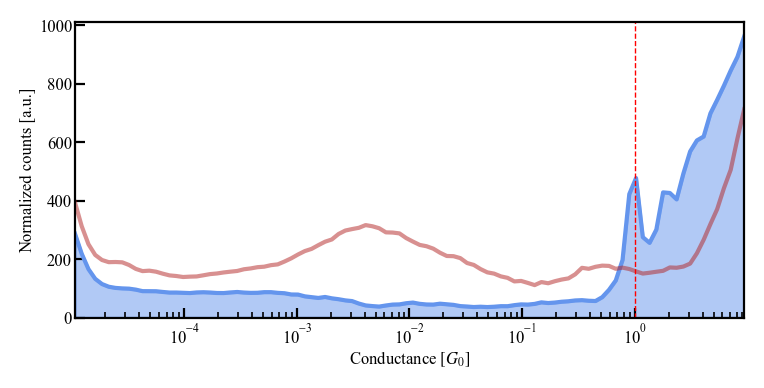

In [11]:
ax = hist.plot_hist_1d(dpi=200)
# ax.set_ylim(0, 50)
ax.axvline(1, ls='--', lw=0.5, c='r')

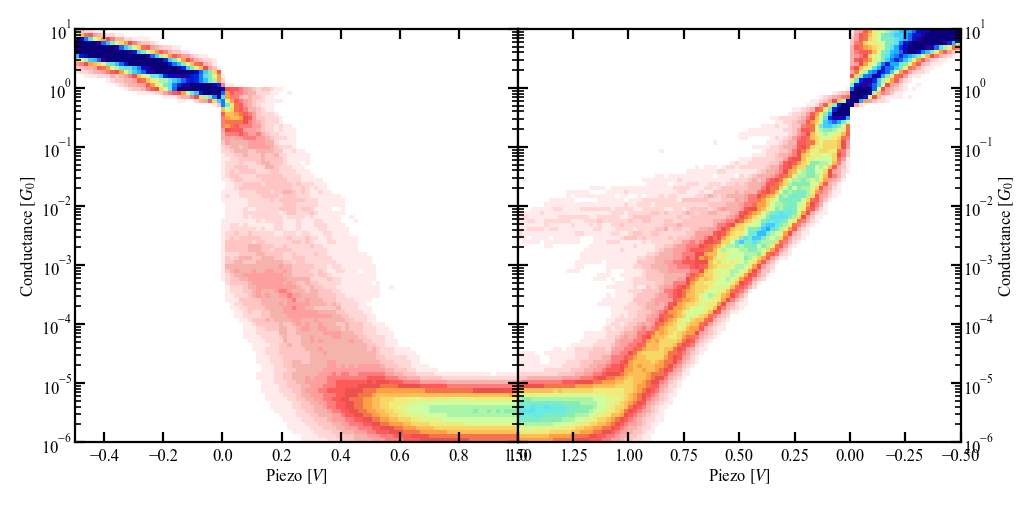

In [9]:
ax_pull, ax_push = hist.plot_hist_2d_both(dpi=200, vmax=32000)

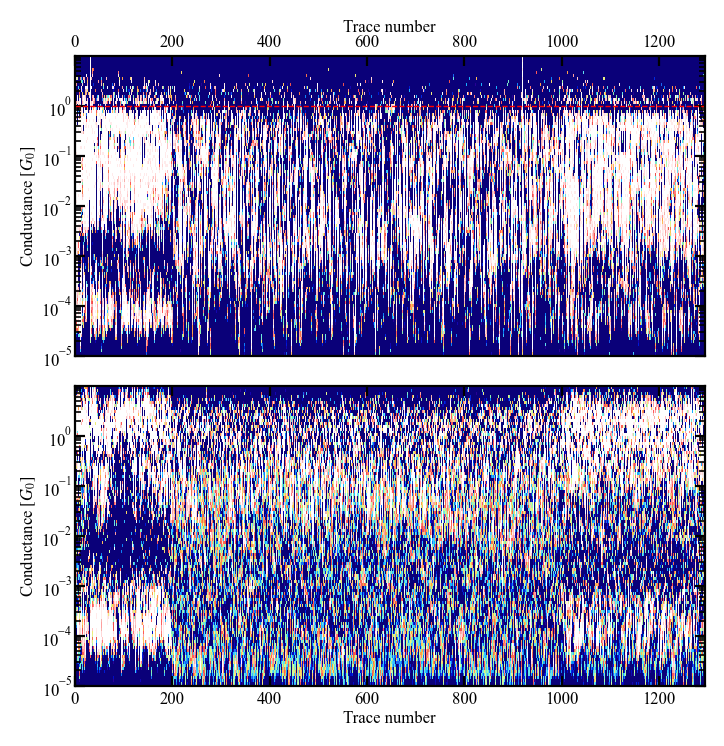

In [10]:
ax_temp_pull, ax_temp_push = hist.plot_temporal_hist(vmax_pull=30, vmax_push=200, dpi=200)
ax_temp_pull.axhline(1, ls='--', lw=0.5, c='r')

In [12]:
traces_BPY_4 = np.hstack((np.arange(start=1001, stop=1200, step=1), np.arange(start=7001, stop=7300, step=1)))

In [13]:
# calculate histogram
hist = Histogram(folder=home_folder,
                     traces=traces_BPY_4,  #8000
                     conductance_range=(1e-5, 10),
                     conductance_log_scale=True,
                     conductance_bins_num=100,
                     conductance_bins_mode='total')

hist.calc_stats(align_at=0.5, interpolate=True,
                range_pull=(-0.5, 1),
                range_push=(-0.5, 1.5))

hist.calc_corr_hist_2d()

# hist.save_histogram(fname='hist_BPY_8000.h5')

  0%|          | 0/498 [00:00<?, ?it/s]

Pull 2D histogram created from 498 traces
Push 2D histogram created from 498 traces


  0%|          | 0/498 [00:00<?, ?it/s]

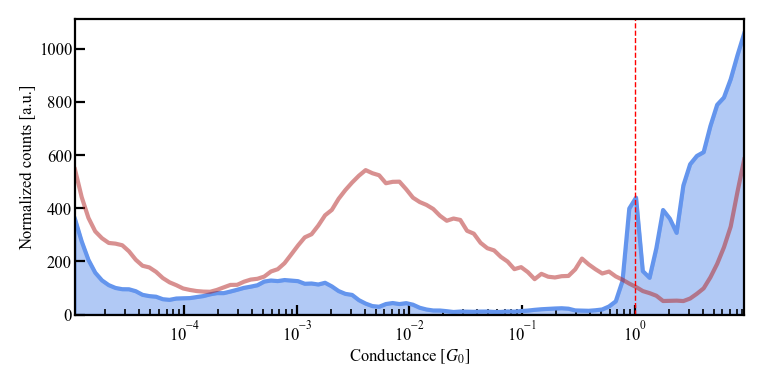

In [14]:
ax = hist.plot_hist_1d(dpi=200)
# ax.set_ylim(0, 50)
ax.axvline(1, ls='--', lw=0.5, c='r')

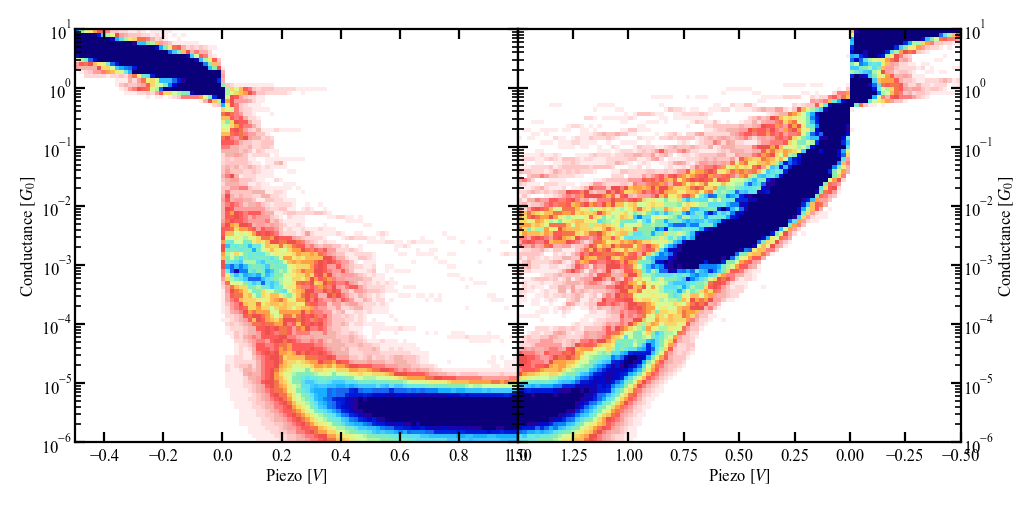

In [18]:
ax_pull, ax_push = hist.plot_hist_2d_both(dpi=200, vmax=5000)

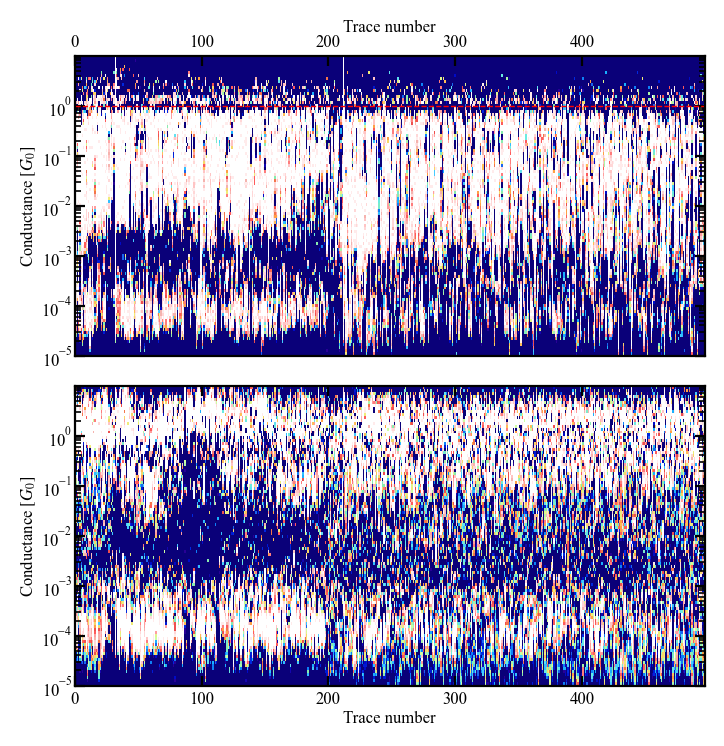

In [16]:
ax_temp_pull, ax_temp_push = hist.plot_temporal_hist(vmax_pull=30, vmax_push=200, dpi=200)
ax_temp_pull.axhline(1, ls='--', lw=0.5, c='r')

In [19]:
traces_BPY_slow = np.hstack((np.arange(start=1201, stop=6203, step=1), np.arange(start=7301, stop=19164, step=1)))

In [20]:
# calculate histogram
hist = Histogram(folder=home_folder,
                     traces=traces_BPY_slow,
                     conductance_range=(1e-5, 10),
                     conductance_log_scale=True,
                     conductance_bins_num=100,
                     conductance_bins_mode='total')

hist.calc_stats(align_at=0.5, interpolate=True,
                range_pull=(-0.5, 1),
                range_push=(-0.5, 1.5))

hist.calc_corr_hist_2d()

# hist.save_histogram(fname='hist_BPY_8000.h5')

  0%|          | 0/16865 [00:00<?, ?it/s]

Pull 2D histogram created from 16865 traces
Push 2D histogram created from 16865 traces


  0%|          | 0/16865 [00:00<?, ?it/s]

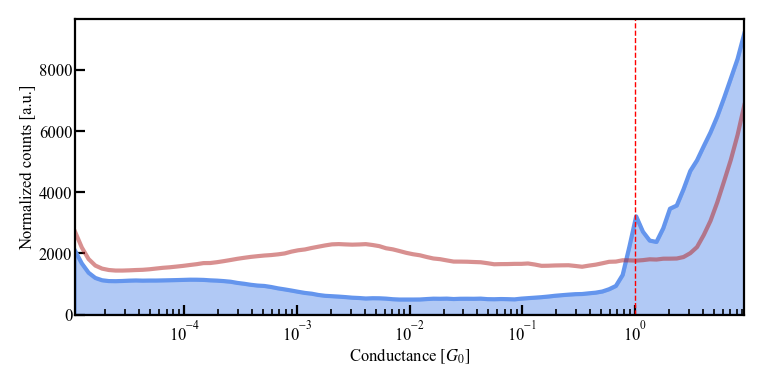

In [21]:
ax = hist.plot_hist_1d(dpi=200)
# ax.set_ylim(0, 50)
ax.axvline(1, ls='--', lw=0.5, c='r')

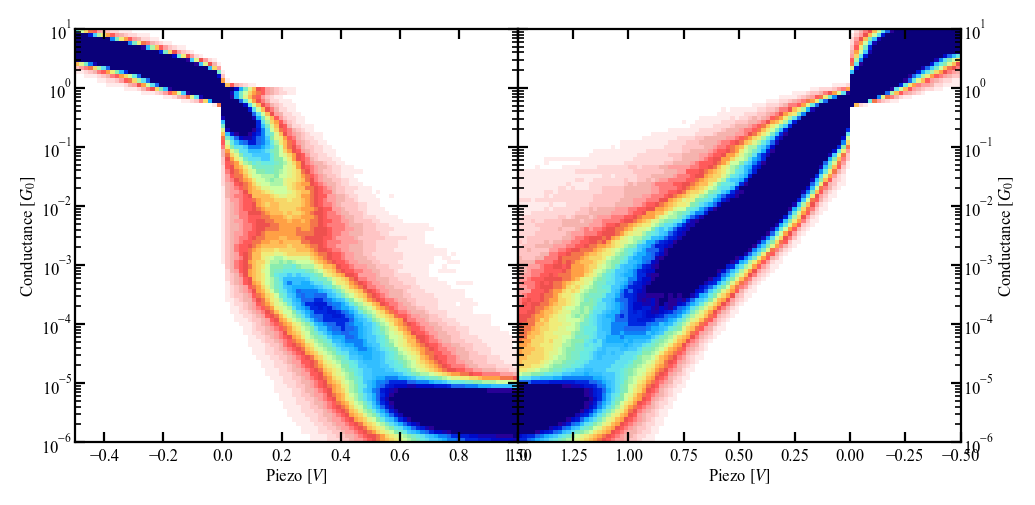

In [25]:
ax_pull, ax_push = hist.plot_hist_2d_both(dpi=200, vmax=1000000)

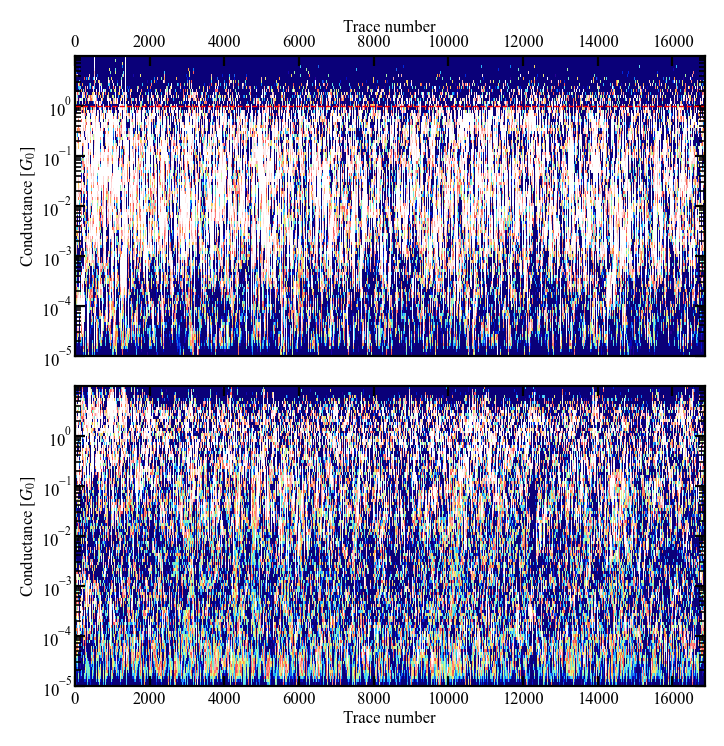

In [27]:
ax_temp_pull, ax_temp_push = hist.plot_temporal_hist(vmax_pull=1000, vmax_push=2000, dpi=200)
ax_temp_pull.axhline(1, ls='--', lw=0.5, c='r')

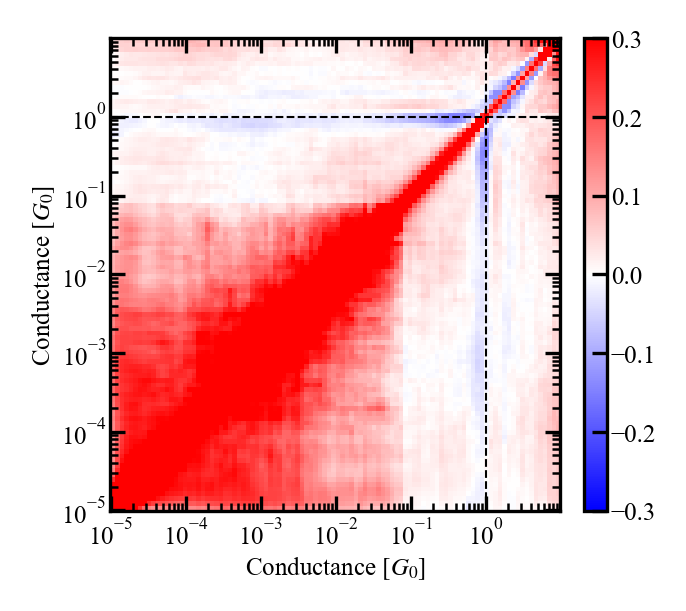

In [28]:
ax_corr, ax_cbar = hist.plot_corr(mode='pull', dpi=300, vmin=-0.3, vmax=0.3)
ax_corr.axhline(1, ls='--', lw=0.5, c='k')
ax_corr.axvline(1, ls='--', lw=0.5, c='k')

In [29]:
pc = PCA(hist=hist, num_of_pcs=5)
pc.calc_principal_components(direction='pull')

pc.project_to_pcs()
pc.calc_pc_hist_all(num_of_bins=100, hist_min=None, hist_max = None)
pc.select_percentage(percentage=20, calc_histograms=True)

Calculating the projections to PCs.:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

(0.0, 4000.0)

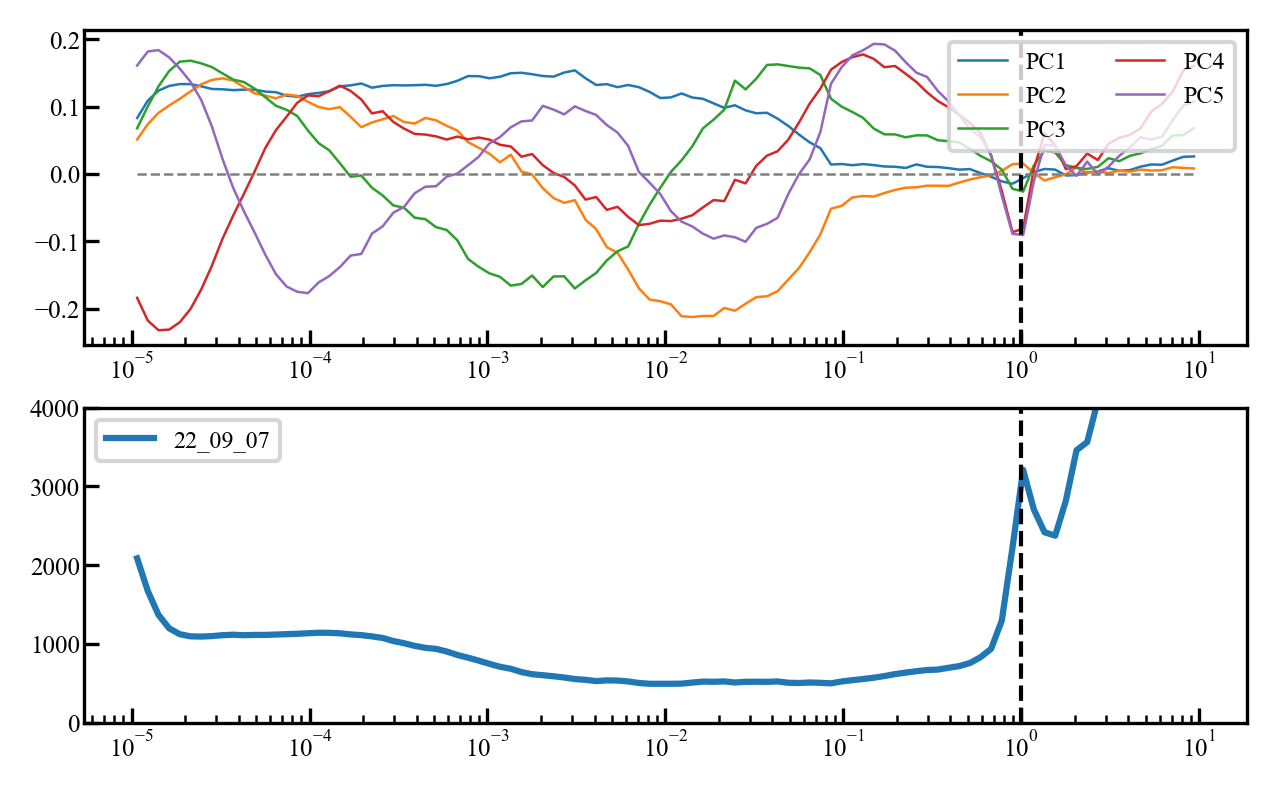

In [33]:
fig, (ax1, ax2) = plt.subplots(nrows=2, dpi=300, figsize=(5, 3))
ax1 = pc.plot_pcs(ax=ax1)
ax2.plot(hist.hist_1d_bins, hist.hist_1d_pull, label='22_09_07')
ax1.axvline(1, ls='--', lw=1, c='k')
ax2.axvline(1, ls='--', lw=1, c='k')
ax2.legend(fontsize='xx-small')
ax1.set_xscale('log')
ax2.set_xscale('log')
ax2.set_ylim(0, 4000)

In [35]:
pc.calc_group_histograms(chosen_pc=('PC3', 'PC4', 'PC5'),
                         conductance_range=(1e-5, 10),
                         conductance_bins_num=100,
                         conductance_log_scale=True,
                         conductance_bins_mode='total')

Calculating 1D and 2D histograms of PC3 group1.


  0%|          | 0/3373 [00:00<?, ?it/s]

  0%|          | 0/3373 [00:00<?, ?it/s]

2D histogram pull direction created from 3373 traces
2D histogram push direction created from 3373 traces
Calculating 1D and 2D histograms of PC3 group2.


  0%|          | 0/3373 [00:00<?, ?it/s]

  0%|          | 0/3373 [00:00<?, ?it/s]

2D histogram pull direction created from 3373 traces
2D histogram push direction created from 3373 traces
Calculating 1D and 2D histograms of PC4 group1.


  0%|          | 0/3373 [00:00<?, ?it/s]

  0%|          | 0/3373 [00:00<?, ?it/s]

2D histogram pull direction created from 3373 traces
2D histogram push direction created from 3373 traces
Calculating 1D and 2D histograms of PC4 group2.


  0%|          | 0/3373 [00:00<?, ?it/s]

  0%|          | 0/3373 [00:00<?, ?it/s]

2D histogram pull direction created from 3373 traces
2D histogram push direction created from 3373 traces
Calculating 1D and 2D histograms of PC5 group1.


  0%|          | 0/3373 [00:00<?, ?it/s]

  0%|          | 0/3373 [00:00<?, ?it/s]

2D histogram pull direction created from 3373 traces
2D histogram push direction created from 3373 traces
Calculating 1D and 2D histograms of PC5 group2.


  0%|          | 0/3373 [00:00<?, ?it/s]

  0%|          | 0/3373 [00:00<?, ?it/s]

2D histogram pull direction created from 3373 traces
2D histogram push direction created from 3373 traces


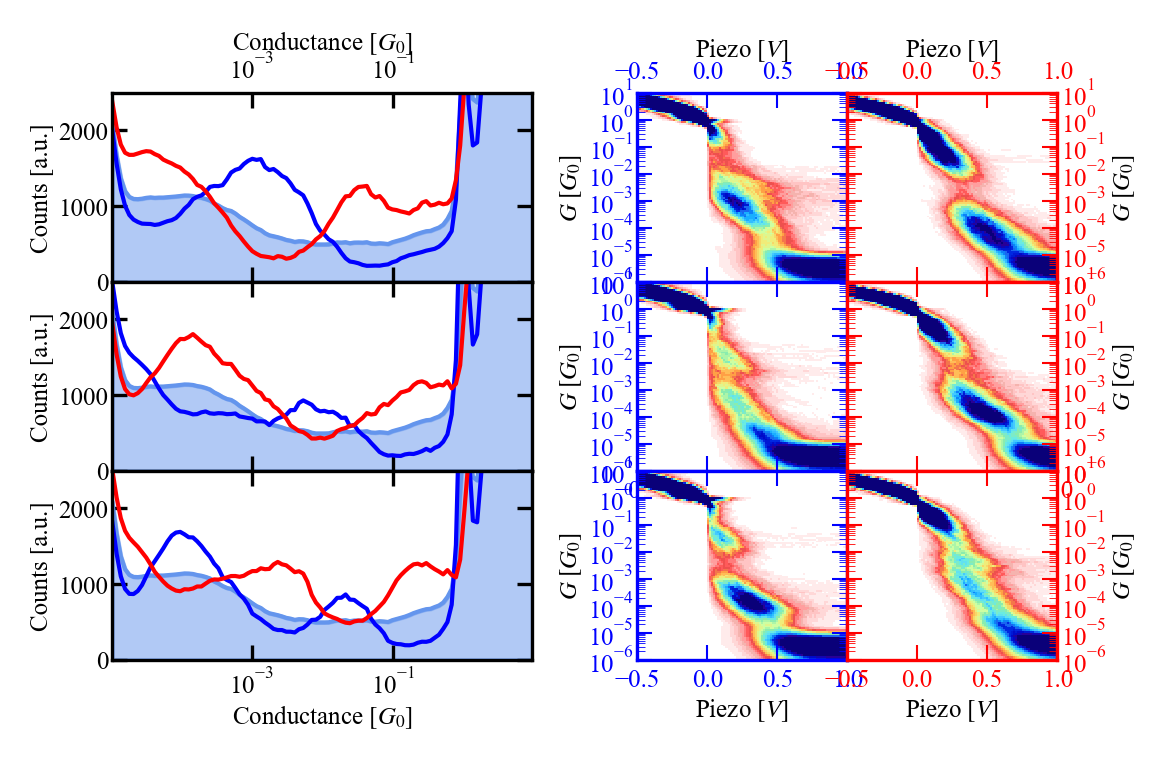

In [41]:
fig = plt.figure(figsize=utils.cm2inch(10, 10), dpi=300)  # figsize: (width, height) in inches
gs = gridspec.GridSpec(nrows=pc.num_of_pcs, ncols=2, width_ratios=(1, 1), height_ratios=(1, )*pc.num_of_pcs,
                       figure=fig, left=0.15, right=0.95, top=0.9, bottom=0.1, wspace=0.25, hspace=0)

gs_2d = gridspec.GridSpecFromSubplotSpec(nrows=pc.num_of_pcs, ncols=2, width_ratios=(1, 1),
                                          subplot_spec=gs[:, 1],
                                          wspace=0, hspace=0) 

axs_1d = []
axs_2d_pull = []
axs_2d_push = []

for i, pc_key in enumerate(('PC3', 'PC4', 'PC5')):
    axs_1d.append(fig.add_subplot(gs[i, 0]))
    axs_2d_pull.append(fig.add_subplot(gs_2d[i, 0]))
    axs_2d_push.append(fig.add_subplot(gs_2d[i, 1]))
    
    if i%pc.num_of_pcs == 0:
        axs_1d[i].xaxis.tick_top()
        axs_1d[i].xaxis.set_label_position('top')
        axs_2d_pull[i].xaxis.tick_top()
        axs_2d_pull[i].xaxis.set_label_position('top')
        axs_2d_push[i].xaxis.tick_top()
        axs_2d_push[i].xaxis.set_label_position('top')
    
    axs_1d[i].xaxis.set_ticks_position('both')
    axs_1d[i].yaxis.set_ticks_position('both')
    axs_2d_pull[i].xaxis.set_ticks_position('both')
    axs_2d_pull[i].yaxis.set_ticks_position('both')
    axs_2d_push[i].xaxis.set_ticks_position('both')
    axs_2d_push[i].yaxis.set_ticks_position('both')
    
    axs_2d_push[i].yaxis.tick_right()
    axs_2d_push[i].yaxis.set_label_position('right')

    axs_1d[i] = hist.plot_hist_1d(ax = axs_1d[i], direction='pull', ylims=(0, 2500), lw=1)
    axs_1d[i].plot(pc.hist_group1[pc_key].hist_1d_bins, pc.hist_group1[pc_key].hist_1d_pull, lw=1, c='b')
    axs_1d[i].plot(pc.hist_group2[pc_key].hist_1d_bins, pc.hist_group2[pc_key].hist_1d_pull, lw=1, c='r')
    axs_2d_pull[i] = pc.hist_group1[pc_key].plot_hist_2d_one(direction='pull', ax=axs_2d_pull[i], vmax=206400)
    # axs_2d_push[i] = pc.hist_group1[pc_key].plot_hist_2d_one(direction='push', ax=axs_2d_push[i], vmax=106400)
    axs_2d_push[i] = pc.hist_group2[pc_key].plot_hist_2d_one(direction='pull', ax=axs_2d_push[i], vmax=206400)
    # axs_2d_push[i] = pc.hist_group2[pc_key].plot_hist_2d_one(direction='push', ax=axs_2d_push[i], vmax=106400)
    
    axs_1d[i].set_ylabel('Counts [a.u.]')
    axs_2d_pull[i].set_ylabel(r'$G\;[G_{0}]$')
    axs_2d_push[i].set_ylabel(r'$G\;[G_{0}]$')
    
    axs_2d_pull[i].spines['bottom'].set_color('b')
    axs_2d_pull[i].spines['top'].set_color('b') 
    axs_2d_pull[i].spines['right'].set_color('b')
    axs_2d_pull[i].spines['left'].set_color('b')
    
    axs_2d_pull[i].tick_params(axis='x', colors='b', which='major', width=0.5)
    axs_2d_pull[i].tick_params(axis='x', colors='b', which='minor', width=0.2)
    axs_2d_pull[i].tick_params(axis='y', colors='b', which='both', width=0.5)
    axs_2d_pull[i].tick_params(axis='y', colors='b', which='minor', width=0.2)
    
    axs_2d_push[i].spines['bottom'].set_color('r')
    axs_2d_push[i].spines['top'].set_color('r') 
    axs_2d_push[i].spines['right'].set_color('r')
    axs_2d_push[i].spines['left'].set_color('r')
    
    axs_2d_push[i].tick_params(axis='x', colors='r', which='major', width=0.5)
    axs_2d_push[i].tick_params(axis='x', colors='r', which='minor', width=0.2)
    axs_2d_push[i].tick_params(axis='y', colors='r', which='both', width=0.5)
    axs_2d_push[i].tick_params(axis='y', colors='r', which='minor', width=0.2)
    
    axs_2d_pull[i].set_xticks([-0.5, 0, 0.5, 1])
    axs_2d_push[i].set_xticks([-0.5, 0, 0.5, 1])